In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
file_path = r"https://raw.githubusercontent.com/ajayt0m/Ensemble-Techniques/main/Pistachio_28_Features_Dataset.xlsx"

pistachio_df = pd.read_excel(file_path)

In [3]:
X = pistachio_df.iloc[:,:-1]
y = pistachio_df.iloc[:,-1]

In [4]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=36)

In [6]:
# Use Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages to be run
    learning_rate=0.1,  # Shrinks the contribution of each weak learner
    max_depth=3,  # Maximum depth of the individual trees
    random_state=27
)

In [7]:
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=27)

In [8]:
gb_classifier.feature_importances_

array([0.0026301 , 0.00214268, 0.00240302, 0.28911584, 0.00635462,
       0.00240621, 0.00296105, 0.00418993, 0.00166813, 0.00628445,
       0.00417382, 0.01158063, 0.39667006, 0.000872  , 0.02806136,
       0.05062968, 0.02324945, 0.01106197, 0.00160619, 0.05850792,
       0.00593162, 0.01100818, 0.01873661, 0.01981625, 0.01378041,
       0.00189669, 0.01272793, 0.0095332 ])

In [9]:
pistachio_df.columns

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')

In [10]:
y_pred = gb_classifier.predict(X_test)

In [11]:
# Reverse label encoding for predictions
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

In [12]:
y_pred_original

array(['Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Siirt_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Kirmizi_Pistachio', 'Siirt_Pistachio', 'Siirt_Pistachio',
       'Kirmizi_Pistachio', 'Siirt_Pistachio', 'Kirmizi_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', '

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_original,y_pred_original)

array([[313,  19],
       [ 35, 170]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_original,y_pred_original)

0.8994413407821229

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(gb_classifier,X_train,y_train,cv=10)

array([0.94444444, 0.9068323 , 0.9068323 , 0.9068323 , 0.89440994,
       0.92546584, 0.91304348, 0.94409938, 0.89440994, 0.90062112])

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test_original,y_pred_original))

                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.90      0.94      0.92       332
  Siirt_Pistachio       0.90      0.83      0.86       205

         accuracy                           0.90       537
        macro avg       0.90      0.89      0.89       537
     weighted avg       0.90      0.90      0.90       537



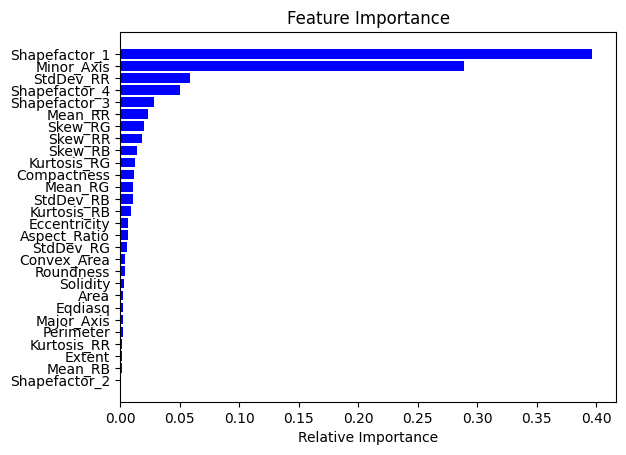

In [17]:
import numpy as np

features = pistachio_df.columns
importance = gb_classifier.feature_importances_
indices = np.argsort(importance)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
# Calculate AUC
y_pred_proba = gb_classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("\nAUC:", auc)


AUC: 0.9635321774904496


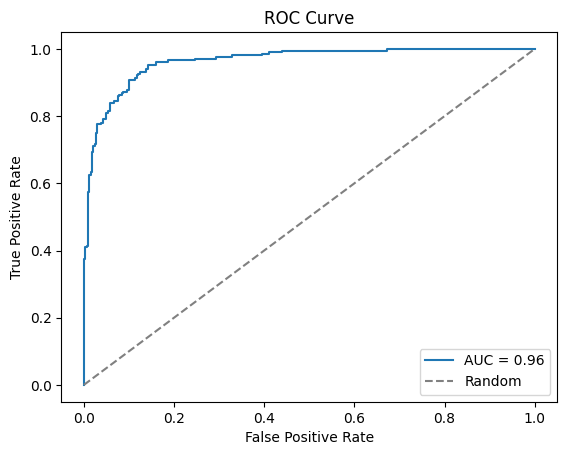

In [19]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()